In [9]:
import pandas as pd
s_train = pd.read_csv("./BTC_USD.csv", index_col="Date", parse_dates=True, squeeze=True)

/var/folders/vq/lr9jr0w132n5fxzlgyfxgg3h0000gn/T/ipykernel_6239/226631959.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  s_train = pd.read_csv("./BTC_USD.csv", index_col="Ngày", parse_dates=True, squeeze=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '16/09/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '15/09/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/io/parsers/base_parser.py:1070: 

In [10]:
from adtk.data import validate_series
s_train = validate_series(s_train)
print(s_train)

Ngày
2020-01-11    13756.0
2020-01-12    18807.0
2020-02-10    10586.0
2020-02-11    13563.0
2020-02-12    19241.0
               ...   
2022-12-05    29089.5
2022-12-06    26670.0
2022-12-07    19310.5
2022-12-08    24395.2
2022-12-09    22395.0
Name: Giá, Length: 715, dtype: float64


[<AxesSubplot:>]

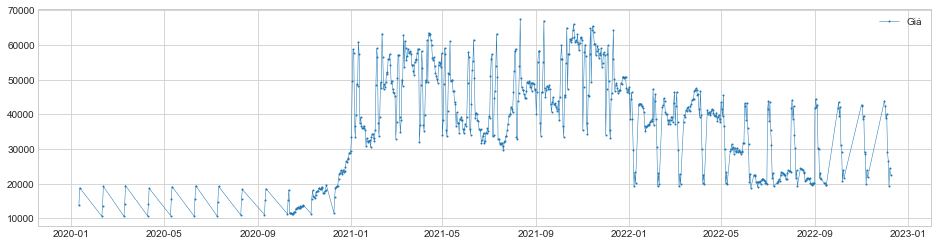

In [11]:
from adtk.visualization import plot
plot(s_train)

from adtk.data import resample
s_train = resample(s_train, dT="15 min")

In [12]:
from adtk.detector import SeasonalAD
seasonal_ad = SeasonalAD()
anomalies = seasonal_ad.fit_detect(s_train)
plot(s_train, anomaly=anomalies, anomaly_color="red", anomaly_tag="marker")

RuntimeError: Series does not follow any known frequency (e.g. second, minute, hour, day, week, month, year, etc.